# Telecom Domain - Churn Prediction

### **Description : Given churn dataset csv file, and target feature(churn). We need to predict the churn in telecom domain.**

## Step - 1 : Load the data and perform the basic EDA to understand the data.

### Exploratory Data Analysis

In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load and Explore the Dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\Python Files\ML_Projects\churn_dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check for missing values in each column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Display summary statistics for the DataFrame
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Identify duplicate rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [7]:
#Removing missing values 
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,0,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,1,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,45,42.30,0,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,1,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Display the first few values of the 'Churn' column
df_dummies['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

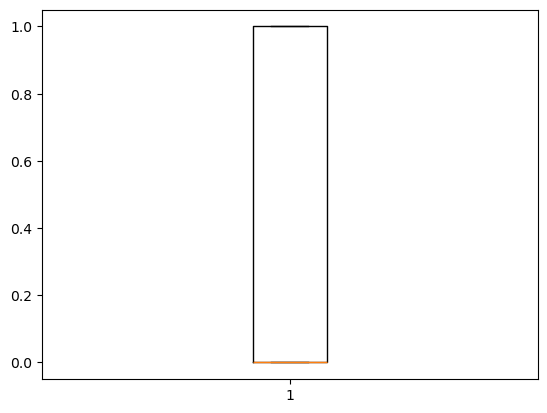

In [9]:
#Identifying outliers in Churn numerical data using box plot visualization
plt.boxplot(x=df_dummies['Churn'])
plt.show()

### Univariate Analysis

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


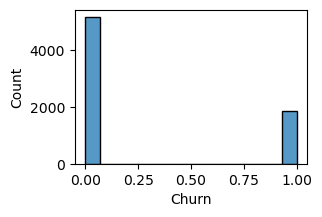

In [10]:
#Univariate Analysis on numerical column (Churn) using hist plot
plt.figure(figsize=(3,2))
sns.histplot(df_dummies['Churn'])
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


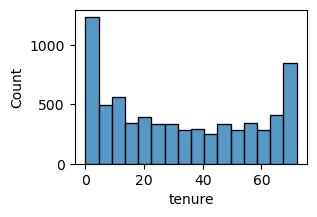

In [11]:
#Univariate Analysis on numerical column (tenure) using hist plot
plt.figure(figsize=(3,2))
sns.histplot(df['tenure'])
plt.show()

Churn
No     5174
Yes    1869
Name: count, dtype: int64


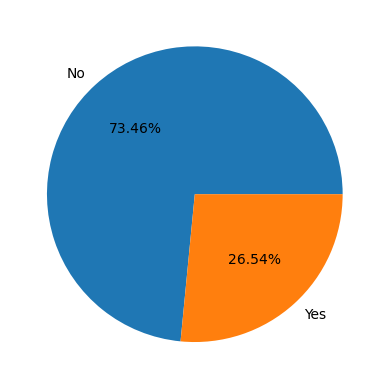

In [12]:
#Univariate Analysis on categorical column (Churn) using pie plot
x = df['Churn'].value_counts().head(5)
print(x)
plt.pie(x.values, labels = x.index, autopct='%1.2f%%')
plt.show()

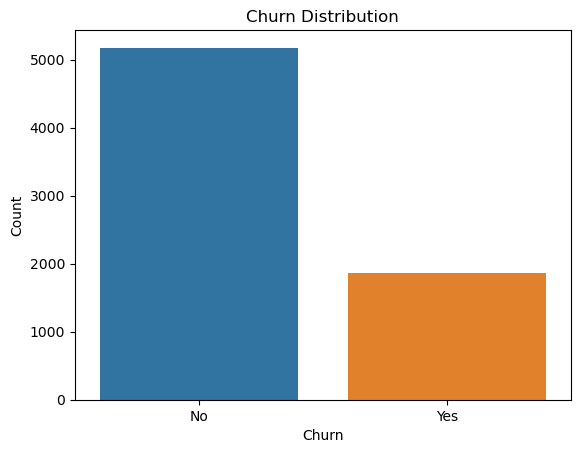

In [13]:
# Create a count plot for the 'Churn' column 
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

## Bivariate Analysis

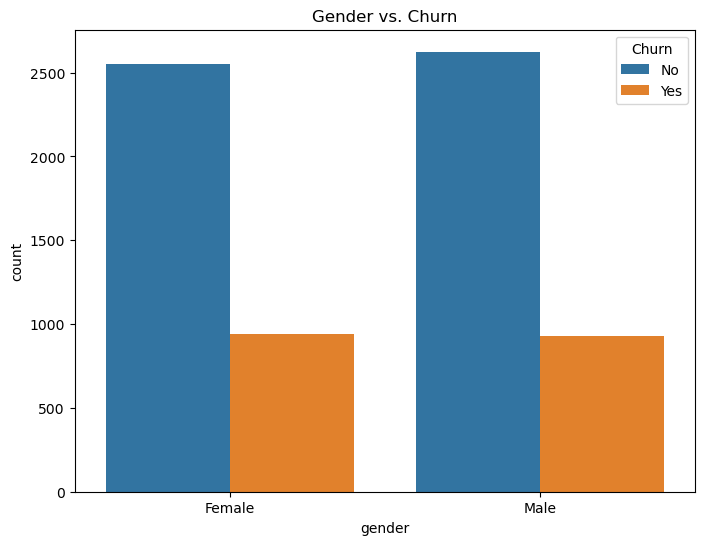

In [14]:
#Bivariate Analysis on categorical columns using count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender vs. Churn')
plt.show()

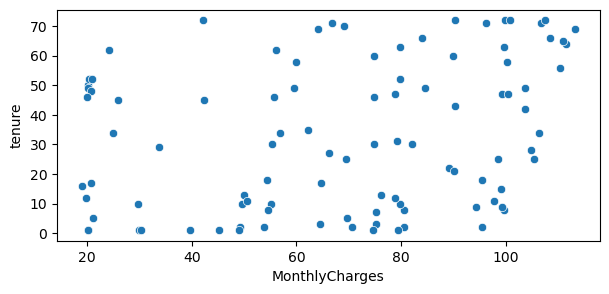

In [15]:
#Bivariate Analysis on numerical columns using scatter plot
plt.figure(figsize=(7,3))
sns.scatterplot(x=df['MonthlyCharges'].head(100), y=df['tenure'])
plt.show()

## Multivariate Analysis

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


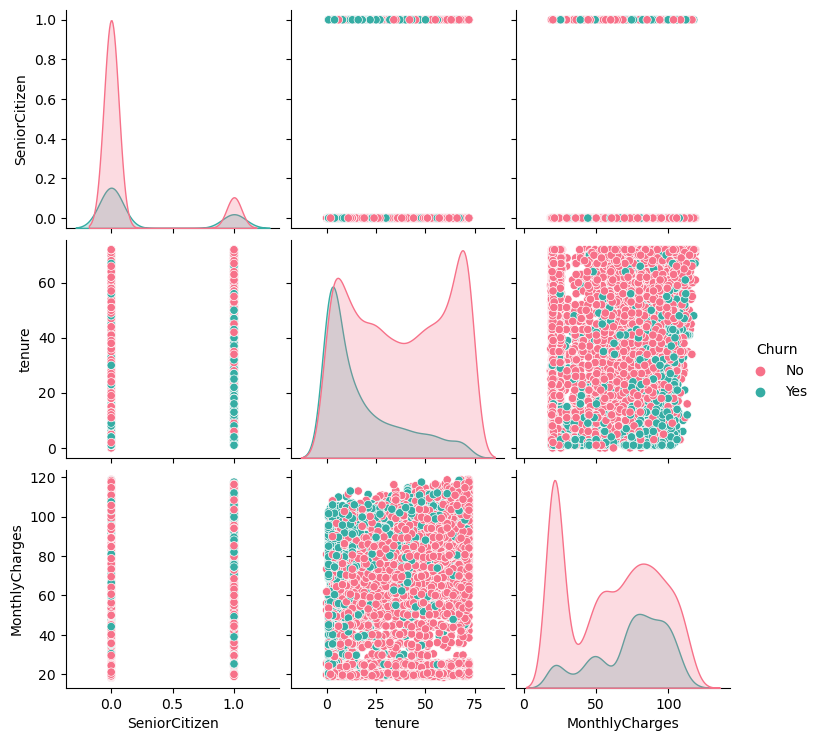

In [16]:
#Multivariate Analysis using pair plot
sns.pairplot(df, hue='Churn', palette='husl')
plt.show()

## Data Preprocessing

In [17]:
# Display the first few rows of the DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### diving the columns as x and y

In [18]:
#x is the training columns and y is the target column
y = df['Churn']
x = df.drop(columns=['Churn'])
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [19]:
# Display the first few rows of the DataFrame
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


## Step 3 : Splitting the dataset into Training and Testing 

In [20]:
#importing train_test_split from model_selection from sklearn to split the data into train & test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(5282, 20) (1761, 20)
(5282,) (1761,)


In [21]:
#checking the dtypes of x_train columns
x_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [22]:
#creating an object for categorical columns
x_train_cat = x_train.select_dtypes(include=['object'])
x_train_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
3296,2229-VWQJH,Female,No,No,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),1233.25
6397,7994-XIRTR,Male,No,No,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),3529.95
6043,6338-AVWCY,Male,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,130.75
5309,0704-VCUMB,Female,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),1278.8
3000,7613-LLQFO,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,1059.55


In [23]:
#creating an object for numerical columns 
x_train_num = x_train.select_dtypes(include=['int64','float64'])
x_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges
3296,0,24,49.30
6397,1,54,65.25
6043,0,3,40.15
5309,0,61,20.25
3000,0,12,84.45


## Step 4 : Data preparation on train data

### For Categorical features -  Performing Label Encoding 

In [24]:
#creating data frame for categorical features/columns of training data
x_train_cat_le = pd.DataFrame(index=x_train_cat.index)
x_train_cat_le.head()

""
3296
6397
6043
5309
3000


In [25]:
# Display the first few rows of the DataFrame
x_train_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
3296,2229-VWQJH,Female,No,No,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),1233.25
6397,7994-XIRTR,Male,No,No,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),3529.95
6043,6338-AVWCY,Male,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,130.75
5309,0704-VCUMB,Female,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),1278.8
3000,7613-LLQFO,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,1059.55


In [26]:
#checking unique rows in 'gender' column and returns an array and applying lambda function
x_train_cat.gender.unique()

gender_encoder = {'Female':1, 'Male':2}

x_train_cat_le['gender'] = x_train_cat['gender'].apply(lambda x : gender_encoder[x])

x_train_cat_le.head()

,gender
3296,1
6397,2
6043,2
5309,1
3000,2


In [27]:
#checking unique rows in 'Partner' column and returns an array and applying lambda function
x_train_cat.Partner.unique()

Partner_encoder = {'No':1, 'Yes':2}

x_train_cat_le['Partner'] = x_train_cat['Partner'].apply(lambda x : Partner_encoder[x])

x_train_cat_le.head()

,gender,Partner
3296,1,1
6397,2,1
6043,2,1
5309,1,2
3000,2,1


In [28]:
#checking unique rows in 'MultipleLines' column and returns an array and applying lambda function

x_train_cat.MultipleLines.unique()

MultipleLines_encoder = {'No':1, 'No phone service':2, 'Yes':3}

x_train_cat_le['MultipleLines'] = x_train_cat['MultipleLines'].apply(lambda x : MultipleLines_encoder[x])

x_train_cat_le.head()

,gender,Partner,MultipleLines
3296,1,1,1
6397,2,1,1
6043,2,1,2
5309,1,2,1
3000,2,1,3


In [29]:
#checking unique rows in 'InternetService' column and returns an array and applying lambda function
x_train_cat.InternetService.unique()

InternetService_encoder = {'DSL':1, 'No':2, 'Fiber optic':3}

x_train_cat_le['InternetService'] = x_train_cat['InternetService'].apply(lambda x : InternetService_encoder[x])

x_train_cat_le.head()

,gender,Partner,MultipleLines,InternetService
3296,1,1,1,1
6397,2,1,1,1
6043,2,1,2,1
5309,1,2,1,2
3000,2,1,3,3


In [30]:
#checking unique rows in 'OnlineSecurity' column and returns an array and applying lambda function
x_train_cat.OnlineSecurity.unique()

OnlineSecurity_encoder = {'No':1, 'No internet service':2, 'Yes':3}

x_train_cat_le['OnlineSecurity'] = x_train_cat['OnlineSecurity'].apply(lambda x : OnlineSecurity_encoder[x])

x_train_cat_le.head()

,gender,Partner,MultipleLines,InternetService,OnlineSecurity
3296,1,1,1,1,1
6397,2,1,1,1,1
6043,2,1,2,1,1
5309,1,2,1,2,2
3000,2,1,3,3,1


In [31]:
#checking unique rows in 'DeviceProtection' column and returns an array and applying lambda function
x_train_cat.DeviceProtection.unique()

DeviceProtection_encoder = {'Yes':1, 'No internet service':2, 'No':3}

x_train_cat_le['DeviceProtection'] = x_train_cat['DeviceProtection'].apply(lambda x : DeviceProtection_encoder[x])

x_train_cat_le.head()

,gender,Partner,MultipleLines,InternetService,OnlineSecurity,DeviceProtection
3296,1,1,1,1,1,1
6397,2,1,1,1,1,1
6043,2,1,2,1,1,1
5309,1,2,1,2,2,2
3000,2,1,3,3,1,3


In [32]:
#checking unique rows in 'TechSupport' column and returns an array and applying lambda function
x_train_cat.TechSupport.unique()

TechSupport_encoder = {'No':1, 'Yes':2, 'No internet service':3}

x_train_cat_le['TechSupport'] = x_train_cat['TechSupport'].apply(lambda x : TechSupport_encoder[x])

x_train_cat_le.head()

,gender,Partner,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport
3296,1,1,1,1,1,1,1
6397,2,1,1,1,1,1,2
6043,2,1,2,1,1,1,1
5309,1,2,1,2,2,2,3
3000,2,1,3,3,1,3,1


In [33]:
#checking unique rows in 'Contract' column and returns an array and applying lambda function
x_train_cat.Contract.unique()

Contract_encoder = {'Month-to-month':1, 'One year':2, 'Two year':3}

x_train_cat_le['Contract'] = x_train_cat['Contract'].apply(lambda x : Contract_encoder[x])

x_train_cat_le.head()

,gender,Partner,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,Contract
3296,1,1,1,1,1,1,1,1
6397,2,1,1,1,1,1,2,2
6043,2,1,2,1,1,1,1,1
5309,1,2,1,2,2,2,3,3
3000,2,1,3,3,1,3,1,1


In [34]:
#checking unique rows in 'PaperlessBilling' column and returns an array and applying lambda function
x_train_cat.PaperlessBilling.unique()

PaperlessBilling_encoder = {'Yes':1, 'No':2}

x_train_cat_le['PaperlessBilling'] = x_train_cat['PaperlessBilling'].apply(lambda x : PaperlessBilling_encoder[x])

x_train_cat_le.head()

,gender,Partner,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,Contract,PaperlessBilling
3296,1,1,1,1,1,1,1,1,1
6397,2,1,1,1,1,1,2,2,2
6043,2,1,2,1,1,1,1,1,1
5309,1,2,1,2,2,2,3,3,2
3000,2,1,3,3,1,3,1,1,1


In [35]:
#checking unique rows in 'PaymentMethod' column and returns an array and applying lambda function
x_train_cat.PaymentMethod.unique()

PaymentMethod_encoder = {'Credit card (automatic)':1, 'Bank transfer (automatic)':2, 'Mailed check':3, 'Electronic check':4}

x_train_cat_le['PaymentMethod'] = x_train_cat['PaymentMethod'].apply(lambda x : PaymentMethod_encoder[x])

x_train_cat_le.head()

,gender,Partner,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod
3296,1,1,1,1,1,1,1,1,1,1
6397,2,1,1,1,1,1,2,2,2,2
6043,2,1,2,1,1,1,1,1,1,3
5309,1,2,1,2,2,2,3,3,2,1
3000,2,1,3,3,1,3,1,1,1,4


### For Numerical features - Performing Standardization 

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num),
                                   columns = x_train_num.columns,
                                   index = x_train_num.index)
x_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges
3296,-0.435476,-0.340191,-0.514314
6397,2.296336,0.883210,0.017840
6043,-0.435476,-1.196572,-0.819594
5309,-0.435476,1.168670,-1.483535
3000,-0.435476,-0.829552,0.658427


In [37]:
#merging x_train_num data and x_train_cat_le data using concat method which is called x_train_transformed data
x_train_transform = pd.concat([x_train_num_rescaled, x_train_cat_le], axis =1)

x_train_transform.head()

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod
3296,-0.435476,-0.340191,-0.514314,1,1,1,1,1,1,1,1,1,1
6397,2.296336,0.883210,0.017840,2,1,1,1,1,1,2,2,2,2
6043,-0.435476,-1.196572,-0.819594,2,1,2,1,1,1,1,1,1,3
5309,-0.435476,1.168670,-1.483535,1,2,1,2,2,2,3,3,2,1
3000,-0.435476,-0.829552,0.658427,2,1,3,3,1,3,1,1,1,4


## Step - 5: Data preparation on test data

In [38]:
# Display a concise summary of the DataFrame
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1761 entries, 2200 to 450
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1761 non-null   object 
 1   gender            1761 non-null   object 
 2   SeniorCitizen     1761 non-null   int64  
 3   Partner           1761 non-null   object 
 4   Dependents        1761 non-null   object 
 5   tenure            1761 non-null   int64  
 6   PhoneService      1761 non-null   object 
 7   MultipleLines     1761 non-null   object 
 8   InternetService   1761 non-null   object 
 9   OnlineSecurity    1761 non-null   object 
 10  OnlineBackup      1761 non-null   object 
 11  DeviceProtection  1761 non-null   object 
 12  TechSupport       1761 non-null   object 
 13  StreamingTV       1761 non-null   object 
 14  StreamingMovies   1761 non-null   object 
 15  Contract          1761 non-null   object 
 16  PaperlessBilling  1761 non-null   object 
 17

In [39]:
#creating an object for categorical columns
x_test_cat = x_test.select_dtypes(include=['object'])
x_test_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
2200,6296-DDOOR,Female,No,No,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check,1045.25
4627,3680-CTHUH,Male,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),7049.5
3225,4931-TRZWN,Female,No,No,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,923.85
2828,8559-WNQZS,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45
3768,3537-HPKQT,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),4266.4


### For Categorical features Performing LabelEncoding 

In [40]:
#creating data frame for categorical features/columns of testing data
x_test_cat_le = pd.DataFrame(index = x_test_cat.index)

x_test_cat_le.head()

""
2200
4627
3225
2828
3768


In [41]:
#checking unique rows in 'gender' column and returns an array and applying lambda function
x_test_cat.gender.unique()

gender_encoder = {'Female':1, 'Male':2}

x_test_cat_le['gender'] = x_test_cat['gender'].apply(lambda x : gender_encoder[x])

x_test_cat_le.head()

,gender
2200,1
4627,2
3225,1
2828,2
3768,1


In [42]:
#checking unique rows in 'Partner' column and returns an array and applying lambda function
x_test_cat.Partner.unique()

Partner_encoder = {'No':1, 'Yes':2}

x_test_cat_le['Partner'] = x_test_cat['Partner'].apply(lambda x : Partner_encoder[x])

x_test_cat_le.head()

,gender,Partner
2200,1,1
4627,2,1
3225,1,1
2828,2,1
3768,1,2


In [43]:
#checking unique rows in 'MultipleLines' column and returns an array and applying lambda function
x_test_cat.MultipleLines.unique()

MultipleLines_encoder = {'No':1, 'No phone service':2, 'Yes':3}

x_test_cat_le['MultipleLines'] = x_test_cat['MultipleLines'].apply(lambda x : MultipleLines_encoder[x])

x_test_cat_le.head()

,gender,Partner,MultipleLines
2200,1,1,1
4627,2,1,3
3225,1,1,1
2828,2,1,1
3768,1,2,3


In [44]:
#checking unique rows in 'InternetService' column and returns an array and applying lambda function
x_test_cat.InternetService.unique()

InternetService_encoder = {'DSL':1, 'No':2, 'Fiber optic':3}

x_test_cat_le['InternetService'] = x_test_cat['InternetService'].apply(lambda x : InternetService_encoder[x])

x_test_cat_le.head()

,gender,Partner,MultipleLines,InternetService
2200,1,1,1,1
4627,2,1,3,3
3225,1,1,1,1
2828,2,1,1,2
3768,1,2,3,3


In [45]:
#checking unique rows in 'OnlineSecurity' column and returns an array and applying lambda function
x_test_cat.OnlineSecurity.unique()

OnlineSecurity_encoder = {'No':1, 'No internet service':2, 'Yes':3}

x_test_cat_le['OnlineSecurity'] = x_test_cat['OnlineSecurity'].apply(lambda x : OnlineSecurity_encoder[x])

x_test_cat_le.head()

,gender,Partner,MultipleLines,InternetService,OnlineSecurity
2200,1,1,1,1,1
4627,2,1,3,3,3
3225,1,1,1,1,3
2828,2,1,1,2,2
3768,1,2,3,3,1


In [46]:
#checking unique rows in 'DeviceProtection' column and returns an array and applying lambda function
x_test_cat.DeviceProtection.unique()

DeviceProtection_encoder = {'Yes':1, 'No internet service':2, 'No':3}

x_test_cat_le['DeviceProtection'] = x_test_cat['DeviceProtection'].apply(lambda x : DeviceProtection_encoder[x])

x_test_cat_le.head()

,gender,Partner,MultipleLines,InternetService,OnlineSecurity,DeviceProtection
2200,1,1,1,1,1,3
4627,2,1,3,3,3,1
3225,1,1,1,1,3,3
2828,2,1,1,2,2,2
3768,1,2,3,3,1,3


In [47]:
#checking unique rows in 'TechSupport' column and returns an array and applying lambda function
x_test_cat.TechSupport.unique()

TechSupport_encoder = {'No':1, 'Yes':2, 'No internet service':3}

x_test_cat_le['TechSupport'] = x_test_cat['TechSupport'].apply(lambda x : TechSupport_encoder[x])

x_test_cat_le.head()

,gender,Partner,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport
2200,1,1,1,1,1,3,1
4627,2,1,3,3,3,1,2
3225,1,1,1,1,3,3,1
2828,2,1,1,2,2,2,3
3768,1,2,3,3,1,3,1


In [48]:
#checking unique rows in 'Contract' column and returns an array and applying lambda function
x_test_cat.Contract.unique()

Contract_encoder = {'Month-to-month':1, 'One year':2, 'Two year':3}

x_test_cat_le['Contract'] = x_test_cat['Contract'].apply(lambda x : Contract_encoder[x])

x_test_cat_le.head()

,gender,Partner,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,Contract
2200,1,1,1,1,1,3,1,2
4627,2,1,3,3,3,1,2,2
3225,1,1,1,1,3,3,1,1
2828,2,1,1,2,2,2,3,3
3768,1,2,3,3,1,3,1,1


In [49]:
#checking unique rows in 'PaperlessBilling' column and returns an array and applying lambda function
x_test_cat.PaperlessBilling.unique()

PaperlessBilling_encoder = {'Yes':1, 'No':2}

x_test_cat_le['PaperlessBilling'] = x_test_cat['PaperlessBilling'].apply(lambda x : PaperlessBilling_encoder[x])

x_test_cat_le.head()

,gender,Partner,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,Contract,PaperlessBilling
2200,1,1,1,1,1,3,1,2,2
4627,2,1,3,3,3,1,2,2,1
3225,1,1,1,1,3,3,1,1,1
2828,2,1,1,2,2,2,3,3,2
3768,1,2,3,3,1,3,1,1,1


In [50]:
#checking unique rows in 'PaymentMethod' column and returns an array and applying lambda function
x_test_cat.PaymentMethod.unique()

PaymentMethod_encoder = {'Credit card (automatic)':1, 'Bank transfer (automatic)':2, 'Mailed check':3, 'Electronic check':4}

x_test_cat_le['PaymentMethod'] = x_test_cat['PaymentMethod'].apply(lambda x : PaymentMethod_encoder[x])

x_test_cat_le.head()

,gender,Partner,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod
2200,1,1,1,1,1,3,1,2,2,4
4627,2,1,3,3,3,1,2,2,1,1
3225,1,1,1,1,3,3,1,1,1,4
2828,2,1,1,2,2,2,3,3,2,3
3768,1,2,3,3,1,3,1,1,1,1


In [51]:
#fetching 'numerical' type columns in x_test data
x_test_num = x_test.select_dtypes(include=['int64','float64'])
x_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges
2200,0,19,58.20
4627,0,60,116.60
3225,0,13,71.95
2828,0,1,20.45
3768,0,55,77.75


In [52]:
#Performing standardization and rescaling x_train numerical data
x_test_num_rescaled = pd.DataFrame(scaler.transform(x_test_num),
                                  columns = x_test_num.columns,
                                  index = x_test_num.index)
x_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges
2200,-0.435476,-0.544091,-0.217375
4627,-0.435476,1.127890,1.731076
3225,-0.435476,-0.788772,0.241378
2828,-0.435476,-1.278132,-1.476862
3768,-0.435476,0.923990,0.434889


In [53]:
#merging x_test_num data and x_test_cat_le data using concat method which is called x_test_transformed data
x_test_transformed = pd.concat([x_test_num_rescaled, x_test_cat_le], axis=1)
x_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod
2200,-0.435476,-0.544091,-0.217375,1,1,1,1,1,3,1,2,2,4
4627,-0.435476,1.127890,1.731076,2,1,3,3,3,1,2,2,1,1
3225,-0.435476,-0.788772,0.241378,1,1,1,1,3,3,1,1,1,4
2828,-0.435476,-1.278132,-1.476862,2,1,1,2,2,2,3,3,2,3
3768,-0.435476,0.923990,0.434889,1,2,3,3,1,3,1,1,1,1


## Step 6 : Model Building & Step 7 : Evaluation Metrics

### Building the model using Logistic Regression, predicting the y_test data and performing the evaluation metrics 

In [62]:
#building the model using Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train_transform, y_train)

LogisticRegression()

In [63]:
#predicting the y_test data
y_test_pred_LR = regressor.predict(x_test_transformed)

In [64]:
#representing the predicted data into a data frame
temp_df_LR = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_LR})

temp_df_LR.head()

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,No
2828,No,No
3768,No,No


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


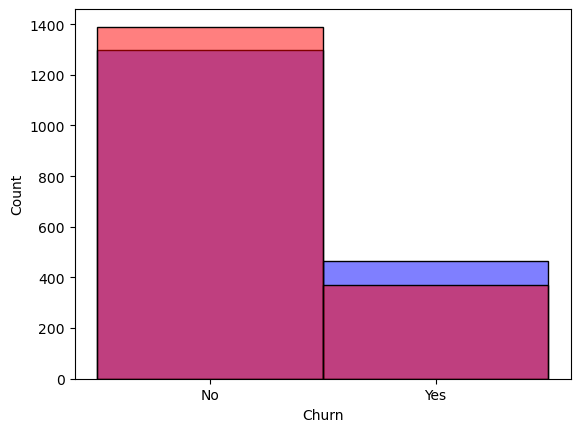

In [65]:
#representing the predicted data in visualization using histplot
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_LR, color='red', alpha=0.5)
plt.show()

In [93]:
#evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_test_pred_LR)
report = classification_report(y_test, y_test_pred_LR)

print("\nAccuracy:", accuracy)
print("\nClassification Report:", report)


Accuracy: 0.794434980124929

Classification Report:               precision    recall  f1-score   support

          No       0.84      0.90      0.87      1298
         Yes       0.64      0.51      0.57       463

    accuracy                           0.79      1761
   macro avg       0.74      0.70      0.72      1761
weighted avg       0.78      0.79      0.79      1761



### Building the model using DecisionTreeClassifier, predicting the y_test data and performing the evaluation metrics

In [68]:
#building the model using DecisionTreeClassifier algorithm
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier()
regressor.fit(x_train_transform, y_train)

DecisionTreeClassifier()

In [69]:
#predicting the y_test data
y_test_pred_DC = regressor.predict(x_test_transformed)

In [70]:
#representing the predicted data into a data frame
temp_df_DC = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_DC})

temp_df_DC.head()

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,Yes
2828,No,No
3768,No,No


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


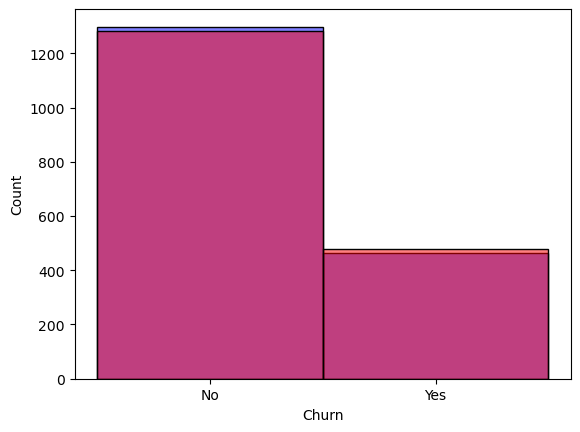

In [71]:
#representing the predicted data in visualization using histplot
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_DC, color='red', alpha=0.5)
plt.show()

In [97]:
#evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_test_pred_DC)
report = classification_report(y_test, y_test_pred_DC)

print("Accuracy:", accuracy)
print("\nClassification Report:", report)

Accuracy: 0.7331061896649631

Classification Report:               precision    recall  f1-score   support

          No       0.82      0.81      0.82      1298
         Yes       0.49      0.51      0.50       463

    accuracy                           0.73      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.74      0.73      0.73      1761



### Building the model using RandomForestClassifier, predicting the y_test data and performing the evaluation metrics

In [75]:
#building the model using RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier()
regressor.fit(x_train_transform, y_train)

RandomForestClassifier()

In [76]:
#predicting the y_test data
y_test_pred_RF = regressor.predict(x_test_transformed)

In [77]:
#representing the predicted data into a data frame
temp_df_RF = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_RF})

temp_df_RF.head()

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,Yes
2828,No,No
3768,No,No


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


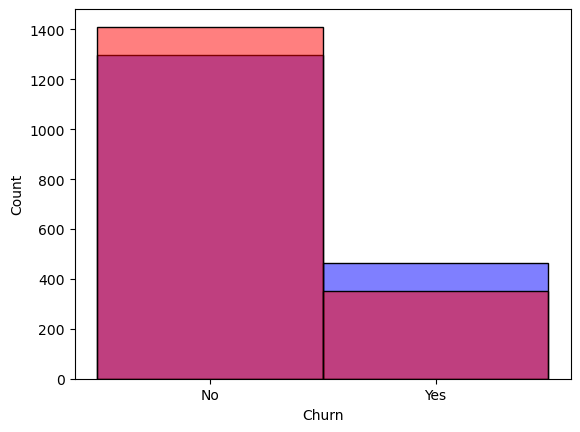

In [78]:
#representing the predicted data in visualization using histplot
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_RF, color='red', alpha=0.5)
plt.show()

In [98]:
#evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_test_pred_RF)
report = classification_report(y_test, y_test_pred_RF)

print("Accuracy:", accuracy)
print("\nClassification Report:", report)

Accuracy: 0.7836456558773425

Classification Report:               precision    recall  f1-score   support

          No       0.82      0.90      0.86      1298
         Yes       0.62      0.47      0.53       463

    accuracy                           0.78      1761
   macro avg       0.72      0.68      0.70      1761
weighted avg       0.77      0.78      0.77      1761



### Building the model using KNeighborsClassifier, predicting the y_test data and performing the evaluation metrics

In [80]:
#building the model using KNeighborsClassifier algorithm
from sklearn.neighbors import KNeighborsClassifier
regressor = KNeighborsClassifier()
regressor.fit(x_train_transform, y_train)

KNeighborsClassifier()

In [81]:
#predicting the y_test data
y_test_pred_KNN = regressor.predict(x_test_transformed)

In [82]:
#representing the predicted data into a data frame
temp_df_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_KNN})

temp_df_KNN.head()

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,Yes
2828,No,No
3768,No,Yes


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


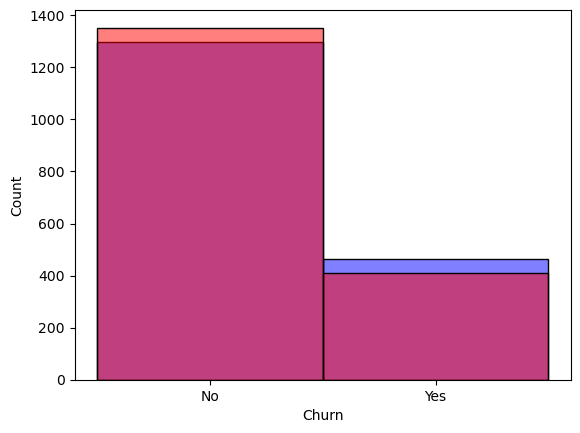

In [83]:
#representing the predicted data in visualization using histplot
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_KNN, color='red', alpha=0.5)
plt.show()

In [99]:
#evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_test_pred_KNN)
report = classification_report(y_test, y_test_pred_KNN)

print("Accuracy:", accuracy)
print("\nClassification Report:", report)

Accuracy: 0.7558205565019875

Classification Report:               precision    recall  f1-score   support

          No       0.82      0.86      0.84      1298
         Yes       0.54      0.48      0.51       463

    accuracy                           0.76      1761
   macro avg       0.68      0.67      0.67      1761
weighted avg       0.75      0.76      0.75      1761



### Building the model using SVC, predicting the y_test data and performing the evaluation metrics

In [85]:
#building the model using SVC algorithm
from sklearn.svm import SVC
regressor = SVC()
regressor.fit(x_train_transform, y_train)

SVC()

In [86]:
#predicting the y_test data
y_test_pred_SVC = regressor.predict(x_test_transformed)

In [87]:
#representing the predicted data into a data frame
temp_df_SVC = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_SVC})

temp_df_SVC.head()

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,No
2828,No,No
3768,No,No


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


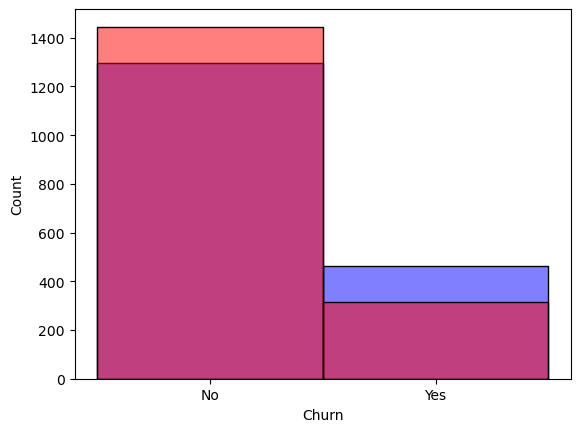

In [88]:
#representing the predicted data in visualization using histplot
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_SVC, color='red', alpha=0.5)
plt.show()

In [100]:
#evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_test_pred_SVC)
report = classification_report(y_test, y_test_pred_SVC)

print("Accuracy:", accuracy)
print("\nClassification Report:", report)

Accuracy: 0.7859170925610448

Classification Report:               precision    recall  f1-score   support

          No       0.82      0.91      0.86      1298
         Yes       0.64      0.43      0.52       463

    accuracy                           0.79      1761
   macro avg       0.73      0.67      0.69      1761
weighted avg       0.77      0.79      0.77      1761



### Building the model using GaussianNB, predicting the y_test data and performing the evaluation metrics

In [102]:
#building the model using GaussianNB algorithm
from sklearn.naive_bayes import GaussianNB
regressor = GaussianNB()
regressor.fit(x_train_transform, y_train)

GaussianNB()

In [103]:
#predicting the y_test data
y_test_pred_NB = regressor.predict(x_test_transformed)

In [104]:
#representing the predicted data into a data frame
temp_df_NB = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_NB})

temp_df_NB.head()

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,Yes
2828,No,No
3768,No,Yes


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


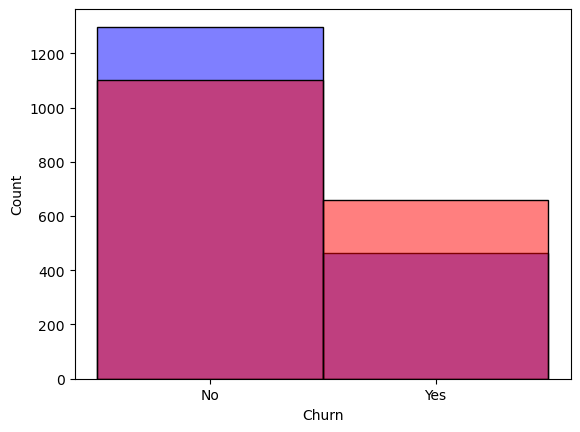

In [105]:
#representing the predicted data in visualization using histplot
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_NB, color='red', alpha=0.5)
plt.show()

In [106]:
#evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_test_pred_NB)
report = classification_report(y_test, y_test_pred_NB)

print("Accuracy:", accuracy)
print("\nClassification Report:", report)

Accuracy: 0.7569562748438388

Classification Report:               precision    recall  f1-score   support

          No       0.89      0.76      0.82      1298
         Yes       0.53      0.75      0.62       463

    accuracy                           0.76      1761
   macro avg       0.71      0.75      0.72      1761
weighted avg       0.80      0.76      0.77      1761



## Step 8 : Displaying a plot which shows all the algorithms applied along with the predicted values

In [112]:
#this is used to create a data frame for actual and predicted values
DF = pd.DataFrame({'Actual': y_test, 'Predicted_LR': y_test_pred_LR, 'Predicted_DTC':y_test_pred_DC, 
                   'Predicted_RFC':y_test_pred_RF, 'Predicted_KNNC':y_test_pred_KNN, 'Predicted_SVC':y_test_pred_SVC, 'Predicted_NB':y_test_pred_NB})
DF.head(10)

,Actual,Predicted_LR,Predicted_DTC,Predicted_RFC,Predicted_KNNC,Predicted_SVC,Predicted_NB
2200,No,No,No,No,No,No,No
4627,No,No,No,No,No,No,No
3225,No,No,Yes,Yes,Yes,No,Yes
2828,No,No,No,No,No,No,No
3768,No,No,No,No,Yes,No,Yes
4446,Yes,Yes,No,Yes,No,Yes,Yes
2234,No,No,No,No,No,No,No
5454,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1278,No,No,No,No,No,No,No
578,No,Yes,No,No,No,No,Yes


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

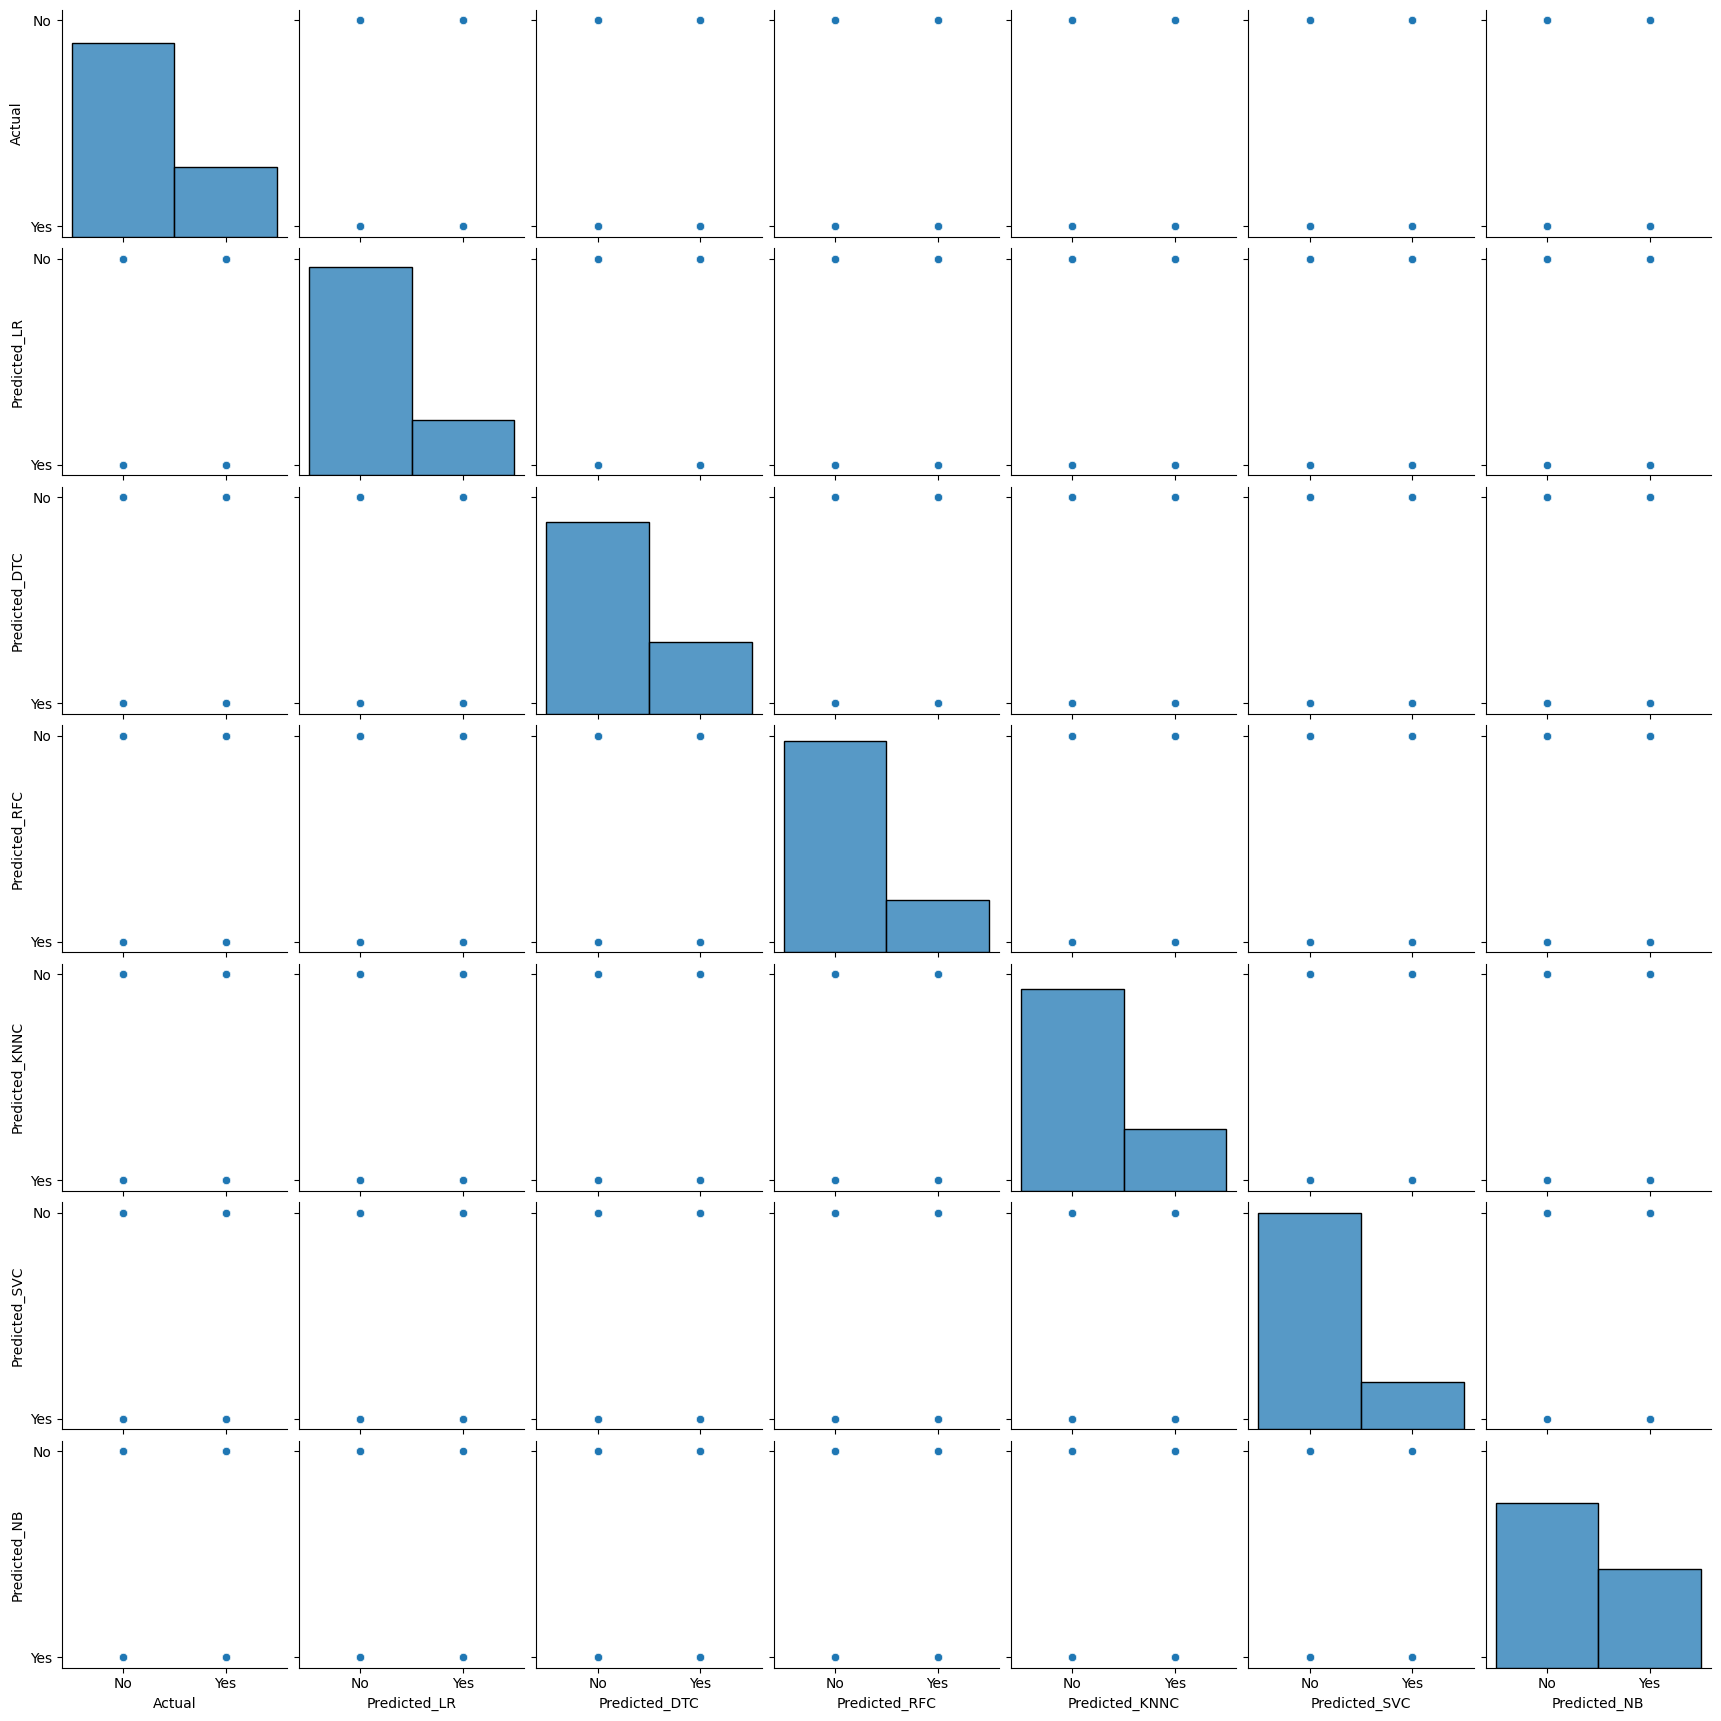

In [134]:
# Define variables for pairplot
x_vars = ['Actual', 'Predicted_LR', 'Predicted_DTC', 'Predicted_RFC', 'Predicted_KNNC', 'Predicted_SVC', 'Predicted_NB']
y_vars = ['Actual', 'Predicted_LR', 'Predicted_DTC', 'Predicted_RFC', 'Predicted_KNNC', 'Predicted_SVC', 'Predicted_NB']

# Create pair plot
sns.pairplot(DF, x_vars=x_vars, y_vars=y_vars)
plt.show()

### Conclusion : 
        After all the comparisions, we can conclude that Random Forest Classifier algorithm is suitable for this churn predicition in telecommunication domain